In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Optional for enhanced visualizations
# Replace 'yourfile.csv' with the path to your CSV file
data = pd.read_csv('cohort_w_confounders.csv')
print(data.head())  # Displays the first 5 rows of the dataframe


   delirium  subject_id   hadm_id   stay_id  icu_length_of_stay_day  age  \
0         1    10236108  21437036  39378505               18.697986   64   
1         0    19024051  25703812  35817619                4.971944   83   
2         1    19404265  26466590  36121575               50.176655   78   
3         0    16679262  25333884  37675459                3.078218   76   
4         0    19388659  24159807  36339611                3.216285   73   

   weight  duration_hours  avg_dose  max_dose  ... wbc_score  \
0    80.0       25.000000  1.391687  3.014089  ...       0.0   
1    95.5        1.233333  0.450928  0.601237  ...       0.0   
2   115.0       98.833333  1.324043  1.861826  ...       0.0   
3    84.3       12.066667  1.317761  1.800599  ...       0.0   
4   112.1       18.466667  2.391572  4.188755  ...       0.0   

   creatinine_score  uo_score  bun_score  sodium_score  albumin_score  \
0               0.0       0.0        2.0           2.0            4.0   
1           

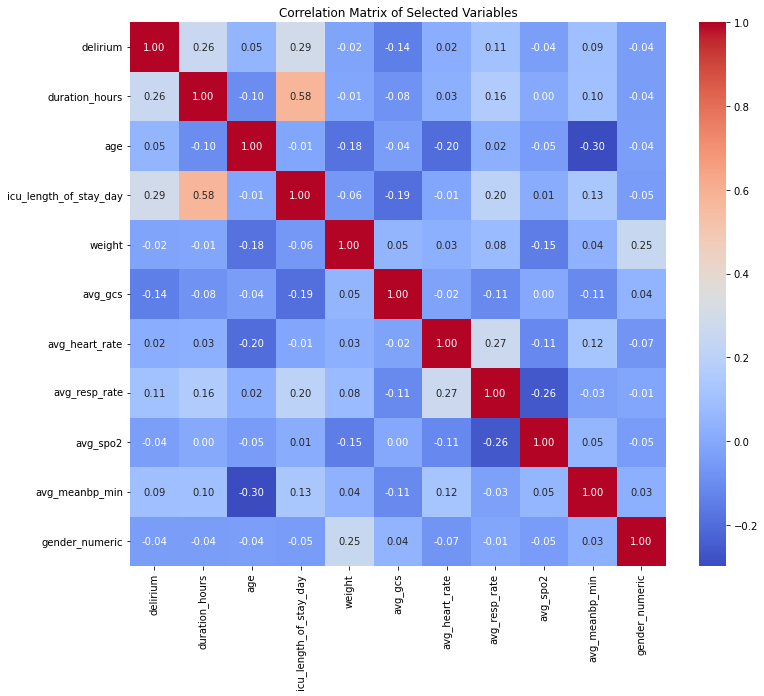

Optimization terminated successfully.
         Current function value: 0.570773
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               delirium   No. Observations:                 3406
Model:                          Logit   Df Residuals:                     3395
Method:                           MLE   Df Model:                           10
Date:                Sat, 13 Apr 2024   Pseudo R-squ.:                 0.09760
Time:                        18:31:05   Log-Likelihood:                -1944.1
converged:                       True   LL-Null:                       -2154.3
Covariance Type:            nonrobust   LLR p-value:                 3.999e-84
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.7126      2.527      1.074      0.283      -2.240      

/Users/kikiboss/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/Users/kikiboss/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/kikiboss/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Model 1 Parameters:
const                     2.712582
duration_hours            0.008654
age                       0.013949
icu_length_of_stay_day    0.101076
weight                    0.002511
avg_gcs                  -0.241913
avg_heart_rate            0.002253
avg_resp_rate             0.013253
avg_spo2                 -0.036706
avg_meanbp_min            0.018645
gender_numeric           -0.153798
dtype: float64
Model 1 P-values:
const                     2.830391e-01
duration_hours            1.411629e-10
age                       3.215811e-06
icu_length_of_stay_day    2.982711e-17
weight                    1.705839e-01
avg_gcs                   2.335932e-06
avg_heart_rate            5.099797e-01
avg_resp_rate             3.473867e-01
avg_spo2                  1.090128e-01
avg_meanbp_min            2.860780e-05
gender_numeric            6.320607e-02
dtype: float64


Model 2 Parameters:
const                     4.617563
duration_hours            0.009654
age                       

/Users/kikiboss/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/Users/kikiboss/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/kikiboss/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [18]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import KFold, train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# Define your columns
selected_columns = [
    'delirium', 'duration_hours', 'age', 'icu_length_of_stay_day',
    'weight', 'avg_gcs', 'avg_heart_rate', 'avg_resp_rate', 'avg_spo2',
    'avg_meanbp_min', 'gender'
]

# Create a smaller dataframe with only selected columns
selected_data = data[selected_columns].copy()  # Work on a copy of the data

# Convert 'gender' to a numeric format
selected_data['gender_numeric'] = selected_data['gender'].map({'M': 1, 'F': 0})

# Drop the original 'gender' column
selected_data.drop(columns=['gender'], inplace=True)

# Handle missing or infinite values
selected_data.replace([np.inf, -np.inf], np.nan, inplace=True)
selected_data.dropna(inplace=True)

# Correlation matrix
correlation_matrix = selected_data.corr()

# Plotting heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Variables")
plt.show()

# Prepare the data for modeling
X = selected_data.drop(columns=['delirium'])
y = selected_data['delirium']

# Adding constant for logistic regression
X = sm.add_constant(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the summary of the regression
print(result.summary())

# Function for sensitivity analysis using k-fold cross-validation
def sensitivity_analysis(X, y, model_class, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = []

    for train_index, test_index in kf.split(X):
        X_train_kf, y_train_kf = X.iloc[train_index], y.iloc[train_index]

        # Handle any potential inf or NaN values within the cross-validation loop
        X_train_kf.replace([np.inf, -np.inf], np.nan, inplace=True)
        X_train_kf.dropna(inplace=True)
        y_train_kf.dropna(inplace=True)

        # Fit the model
        model_kf = model_class(y_train_kf, sm.add_constant(X_train_kf)).fit(disp=0)

        # Collect the model's parameters and p-values
        results.append({
            'params': model_kf.params,
            'pvalues': model_kf.pvalues
        })
    return results

# Run sensitivity analysis
sensitivity_results = sensitivity_analysis(X, y, sm.Logit)

# Now you can examine the sensitivity_results to assess the stability of your model's coefficients
for idx, result in enumerate(sensitivity_results):
    print(f"Model {idx+1} Parameters:")
    print(result['params'])
    print(f"Model {idx+1} P-values:")
    print(result['pvalues'])
    print("\n")
